In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("imdb_movie_dataset.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [8]:
df.shape

(838, 12)

In [9]:
df.to_csv("cleaned_imdb_dataset.csv", index=False)

In [10]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


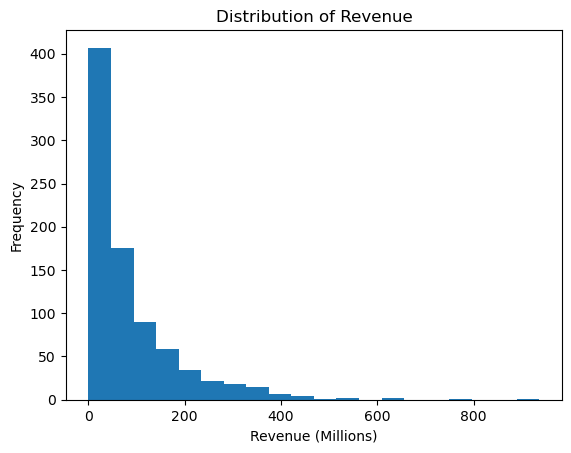

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['Revenue (Millions)'], bins=20)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue (Millions)")
plt.ylabel("Frequency")
plt.show()

In [12]:
df['Revenue (Millions)'].skew()

np.float64(2.5606124650643434)

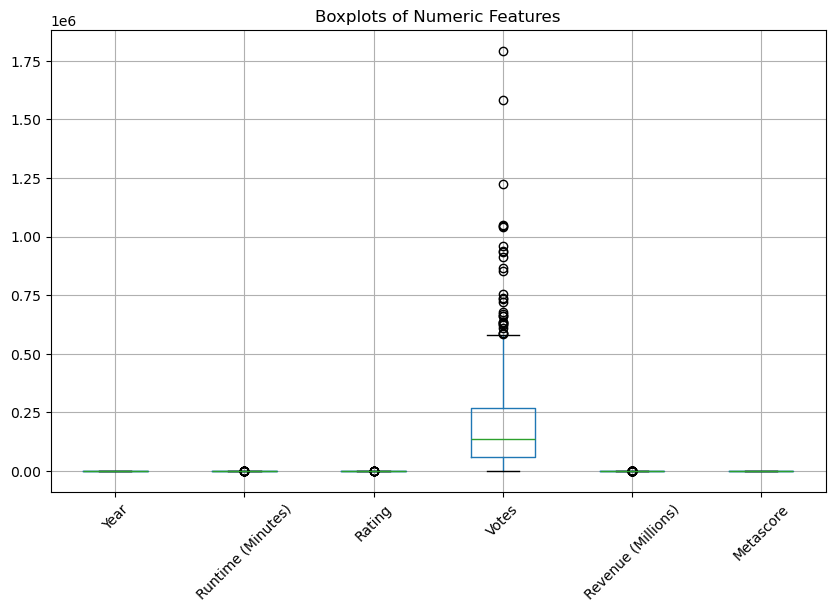

In [13]:
numeric_cols = ['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']

plt.figure(figsize=(10,6))
df[numeric_cols].boxplot()
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.show()

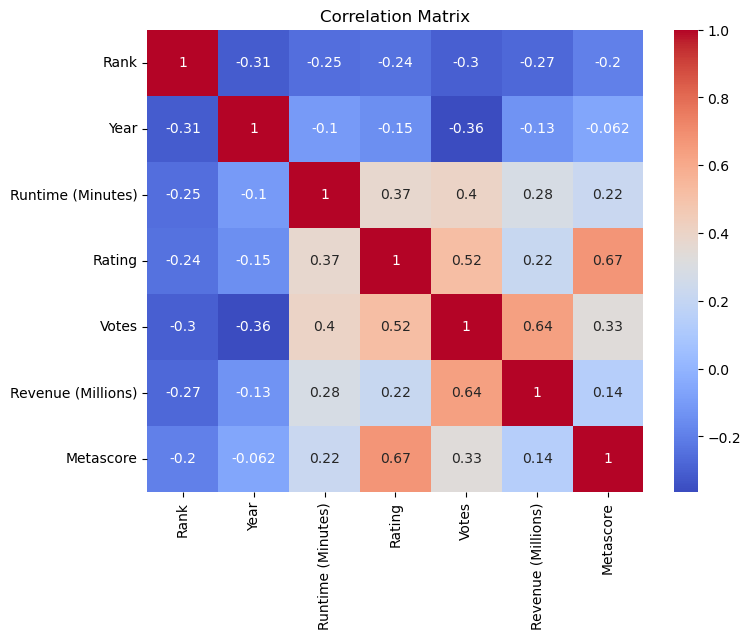

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

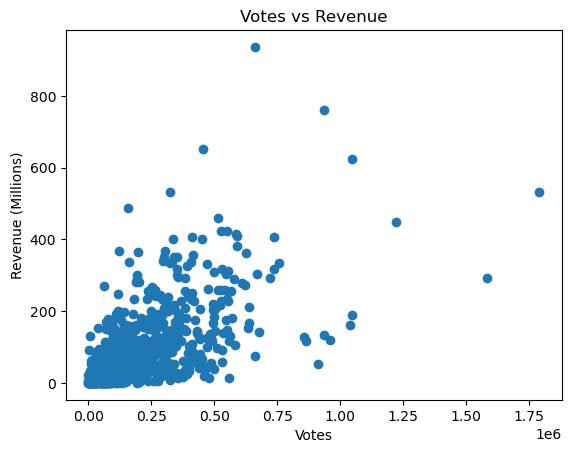

In [15]:
plt.scatter(df['Votes'], df['Revenue (Millions)'])
plt.xlabel("Votes")
plt.ylabel("Revenue (Millions)")
plt.title("Votes vs Revenue")
plt.show()

In [16]:
import numpy as np

# X and Y define karo
x = df['Votes'].values
y = df['Revenue (Millions)'].values

n = len(x)

# required sums
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x * x)

# slope (m)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)

# intercept (c)
c = (sum_y - m * sum_x) / n

print("Slope (m):", m)
print("Intercept (c):", c)

Slope (m): 0.0003447037730110154
Intercept (c): 17.957361620680423


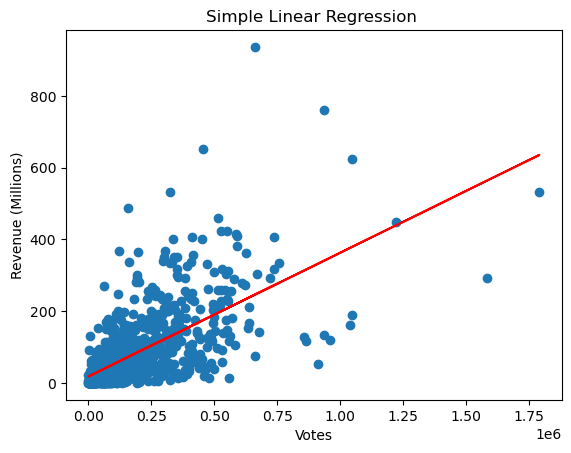

In [18]:
import matplotlib.pyplot as plt

# predictions
y_pred = m * x + c

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel("Votes")
plt.ylabel("Revenue (Millions)")
plt.title("Simple Linear Regression ")
plt.show()

In [19]:
import numpy as np

mse = np.mean((y - y_pred) ** 2)

print("MSE:", mse)

MSE: 6486.234434061143


In [20]:
# Mean of actual y
y_mean = np.mean(y)

# Total Sum of Squares
ss_total = np.sum((y - y_mean) ** 2)

# Residual Sum of Squares
ss_residual = np.sum((y - y_pred) ** 2)

# R2
r2 = 1 - (ss_residual / ss_total)

print("R²:", r2)

R²: 0.40555658915892134
